In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [28]:
gross = pd.read_csv('bom.movie_gross.csv')
gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [32]:
data= pd.read_csv('tmdb.movies.csv', index_col=0)
data.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
budget =pd.read_csv('tn.movie_budgets.csv')
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 271.2+ KB


In [45]:
# Removing any non-numeric characters (like commas) and convert to float
budget['domestic_gross'] = pd.to_numeric(budget['domestic_gross'].replace('[\$,]', '', regex=True))
budget['production_budget'] = pd.to_numeric(budget['production_budget'].replace('[\$,]', '', regex=True))
budget['worlwide_gross'] = pd.to_numeric(budget['worldwide_gross'].replace('[\$,]', '', regex=True))


In [50]:
budget.drop_duplicates()
data.drop_duplicates()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,movie
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Harry Potter and the Deathly Hallows: Part 1
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,How to Train Your Dragon
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Iron Man 2
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Toy Story
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Inception
...,...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,Laboratory Conditions
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,_EXHIBIT_84xxx_
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,The Last One
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Trailer Made


In [48]:
data['movie'] = data['title']
data.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,movie
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Harry Potter and the Deathly Hallows: Part 1
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,How to Train Your Dragon
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Iron Man 2
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Toy Story
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Inception


In [23]:
# Remove any non-numeric characters (like commas) and convert to float
budget['domestic_gross'] = pd.to_numeric(budget['domestic_gross'].replace('[\$,]', '', regex=True))
print(budget['domestic_gross'].dtype)

int64


## Analyzing Peak Release Times
Now, we’ll analyze the number of movies released in each month to identify peak release periods.

In [10]:
budget['release_month'] = budget['release_date'].dt.month
budget['release_month'].head()

0    12
1     5
2     6
3     5
4    12
Name: release_month, dtype: int64

In [13]:
# Count number of movies released each month
monthly_releases = budget['release_month'].value_counts().sort_index()
monthly_releases 


1     347
2     392
3     470
4     454
5     407
6     479
7     440
8     496
9     493
10    573
11    486
12    745
Name: release_month, dtype: int64

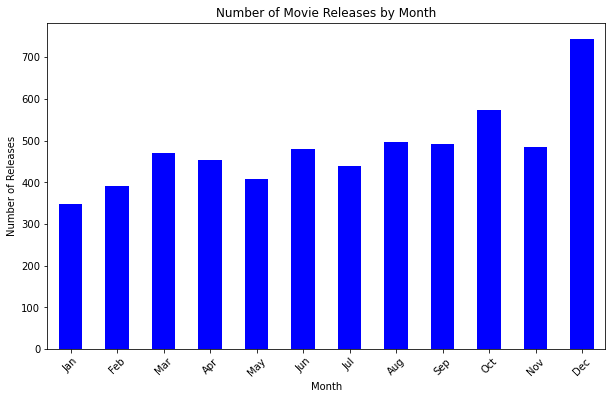

In [16]:
# Plot the number of releases per month
plt.figure(figsize=(10, 6))
monthly_releases.plot(kind='bar', color='blue')
plt.title('Number of Movie Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


## Analyzing Revenue by Month
We can further analyze the average box office revenue for movies released each month to see if there is a correlation between release timing and financial success.

In [25]:
# Group by release month and calculate average domestic gross
avg_revenue_per_month = budget.groupby('release_month')['domestic_gross'].mean()
avg_revenue_per_month

release_month
1     2.394962e+07
2     3.541465e+07
3     3.857299e+07
4     2.732840e+07
5     6.669795e+07
6     6.582791e+07
7     6.072804e+07
8     3.216821e+07
9     2.314989e+07
10    2.442350e+07
11    5.818117e+07
12    4.610082e+07
Name: domestic_gross, dtype: float64

## Statistical Analysis - Testing for Monthly Release Distribution Uniformity
If we want to determine if movies are uniformly released throughout the year, we can use a chi-square test. This test will help us see if the observed distribution of movie releases across months significantly deviates from a uniform distribution.

In [26]:
from scipy.stats import chisquare

# Perform chi-square test on the frequency of releases per month
observed_releases = monthly_releases.values
expected_releases = [monthly_releases.mean()] * 12  # Expected value for uniform distribution

chi_stat, p_value = chisquare(observed_releases, expected_releases)
print(f"Chi-square Statistic: {chi_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("The distribution of movie releases across months is significantly different from uniform.")
else:
    print("The distribution of movie releases across months is not significantly different from uniform.")

Chi-square Statistic: 233.34555517122104, P-value: 8.493608319019405e-44
The distribution of movie releases across months is significantly different from uniform.


## Interpretation of Results
Monthly Release Peaks: The bar chart for the number of releases per month will reveal peak release times, likely around summer and holiday seasons, when audience turnout is higher.

Revenue by Release Month: The average revenue per month can help confirm if certain months tend to yield higher financial returns, indicating potential optimal release timing.

Statistical Significance: If the chi-square test shows a significant result, it suggests that movies are not released uniformly throughout the year, which aligns with industry patterns favoring specific release months.
This analysis can guide the studio in scheduling releases during high-demand months for potentially higher audience turnout and revenue.